In [42]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
data = pd.read_csv("../data/poverty.txt", sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [44]:
data.sample(5)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
15,Iowa,12.2,16.4,55.4,1.8,32.5
11,Hawaii,10.3,17.7,66.4,4.7,38.2
18,Louisiana,19.7,31.7,96.1,17.0,58.1
23,Minnesota,9.2,14.2,47.3,3.9,27.5
50,Wyoming,12.2,17.7,72.1,2.1,39.9


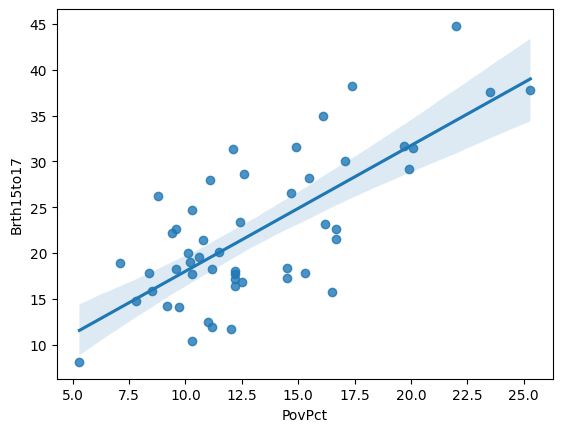

In [45]:
sns.regplot(data=data, x='PovPct', y='Brth15to17')
plt.show()

In [46]:
X = data[["PovPct"]]
y = data[["Brth15to17"]]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    random_state=42,
    test_size=0.3
)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.sample(5)

,Actual,Prediction
8,31.6,24.140762
11,44.8,32.375805
10,23.4,21.241099
0,38.2,27.040425
2,19.0,18.689395


In [51]:
# The coefficients
m=model.coef_[0]
b=model.intercept_
print('Coefficients: \n', m)
print('Interceft: \n', b)

Coefficients: 
 [1.15986524]
Interceft: 
 [6.85876956]


In [52]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, model.predict(X)))
print('Variance score: %.2f' % model.score(X, y))

Mean squared error: 30.46
Variance score: 0.52


In [54]:
reg_line = [(m* float(x)) + b for x in np.array(X)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_11072\1782276292.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reg_line = [(m* float(x)) + b for x in np.array(X)]


In [55]:
x_now = [[16]]
y_now = model.predict(x_now)
print(y_now)

[[25.41661346]]


c:\Users\DELL\anaconda3\envs\cassandra_app\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


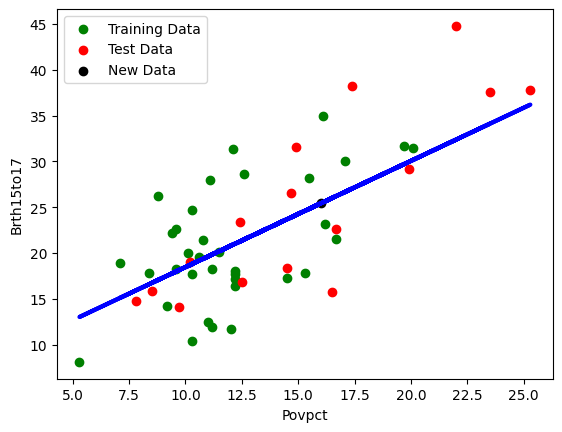

In [57]:
# Plot outputs
plt.scatter(X_train, y_train, color='green', label="Training Data")
plt.scatter(X_test, y_test, color='red', label= "Test Data")
plt.scatter(x_now, y_now, color='black', label= "New Data")
plt.plot(X,reg_line, color="blue", linewidth=3)
plt.xlabel("Povpct")
plt.ylabel("Brth15to17")
plt.legend()
plt.show()